In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
gamma1 = loadtxt('gamma1.dat')
gamma2 = loadtxt('gamma2.dat')

In [3]:
gamma1.shape

(1024, 1024)

<matplotlib.colorbar.Colorbar instance at 0x45aeb48>

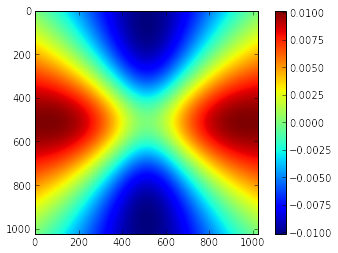

In [4]:
imshow(gamma1)
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x61327a0>

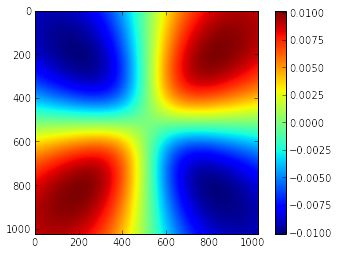

In [5]:
imshow(gamma2)
colorbar()

In [6]:
frec = fftfreq(gamma1.shape[0])
index  = where(frec>=0)[0]

<matplotlib.colorbar.Colorbar instance at 0x6159440>

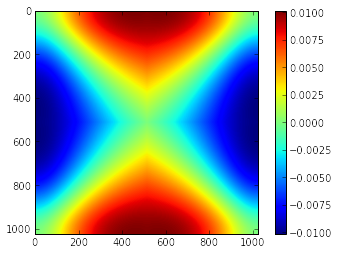

In [7]:
fttgamma1 = fftshift(gamma1)
imshow(fttgamma1)
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x6a57050>

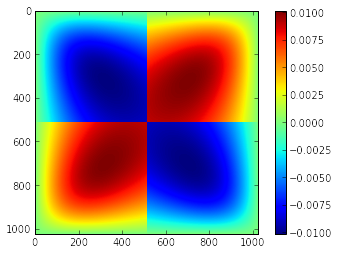

In [8]:
fttgamma2 = fftshift(gamma2)
imshow(fttgamma2)
colorbar()

In [9]:
tgamma1 = np.zeros([512,512]).astype(complex)
tgamma2 = np.zeros([512,512]).astype(complex)

ki = frec[index]
kj = frec[index]

for i in range(512):
    for j in range(512):
        tgamma1[i,j] =  fttgamma1[i,j]
        tgamma2[i,j] =  fttgamma2[i,j]

In [10]:
tkappa = np.zeros([512,512]).astype(complex)
for k1 in range(512):
    for k2 in range(512):
        if ( (k1 != 0) & (k2 != 0) ):
            tkappa[k1,k2] = (ki[k1]**2 + kj[k2]**2)**(-0.5) *( ( ki[k1]**2 - kj[k2]**2 )*tgamma1[k1,k2] + 2*ki[k1]*kj[k2]*tgamma2[k1,k2])
tkappa[0,0]=0

<matplotlib.colorbar.Colorbar instance at 0x6f5b2d8>

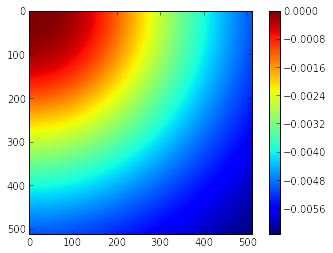

In [11]:
imshow(real(tkappa))
colorbar()

/usr/lib/pymodules/python2.7/matplotlib/colorbar.py:808: RuntimeWarning: invalid value encountered in divide
  z = np.take(y, i0) + (xn-np.take(b,i0))*dy/db
/usr/lib/pymodules/python2.7/matplotlib/colorbar.py:561: RuntimeWarning: invalid value encountered in greater
  inrange = (ticks > -0.001) & (ticks < 1.001)
/usr/lib/pymodules/python2.7/matplotlib/colorbar.py:561: RuntimeWarning: invalid value encountered in less
  inrange = (ticks > -0.001) & (ticks < 1.001)


<matplotlib.colorbar.Colorbar instance at 0x7048f38>

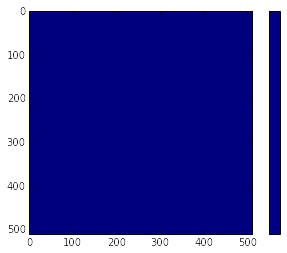

In [12]:
imshow(imag(tkappa))
colorbar()

In [18]:
kappa = ifftshift(tkappa)

<matplotlib.colorbar.Colorbar instance at 0xa12c320>

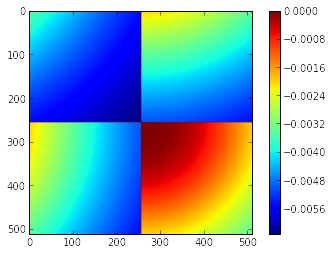

In [19]:
imshow(real(kappa))
colorbar()

<matplotlib.colorbar.Colorbar instance at 0xaa88440>

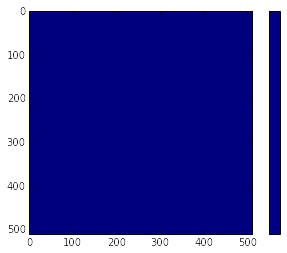

In [20]:
imshow(imag(kappa))
colorbar()

In [21]:
kappa_ext = np.zeros([1024,1024]).astype(complex)

In [22]:
for i in range(1024):
    if i>=512:
        l = i-512
    else:
        l = 511-i
        
    for j in range(1024):
        
        if j>=512:
            m = j-512
        else:
            m = 511-j
        
        kappa_ext[i,j] = kappa[l,m]

<matplotlib.colorbar.Colorbar instance at 0xb73cb90>

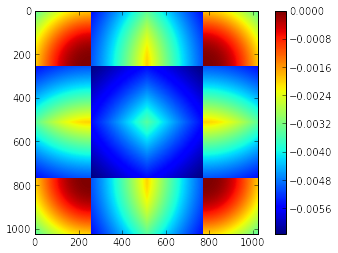

In [25]:
imshow(real(kappa_ext))
colorbar()